(243, 15)

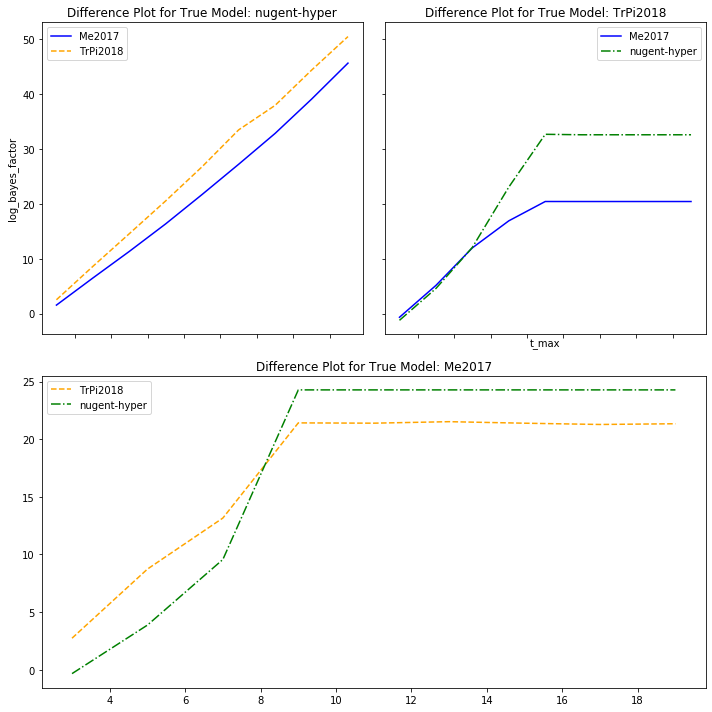

In [2]:
import os
import json
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action='once')
import warnings
warnings.simplefilter('ignore', category=FutureWarning)

df = pd.read_csv('./fit_dataframes/toy-model-fit_df.csv')

display(df.shape)

grouped_df = df.groupby(['t_max', 'fit_model', 'true_model']).agg({'log_bayes_factor': 'median'}).reset_index()
ls_dict = {model: value for model, value in zip(grouped_df['fit_model'].unique(), ['-', '--', '-.', ':'])}
color_dict = {model: value for model, value in zip(grouped_df['fit_model'].unique(), ['blue', 'orange', 'green', 'red'])}

fig, axs = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

# Remove the last subplot to have only 3 plots
fig.delaxes(axs[1, 1])

# Rearrange the placement of subplots
axs = axs.flatten()
axs[2] = plt.subplot2grid((2, 2), (1, 0), rowspan=1, colspan=2)


for axi, model in enumerate(['nugent-hyper','TrPi2018','Me2017']):
    iter_df = grouped_df[grouped_df['true_model'] == model]
    
    ax = axs[axi]
    for fit_model in grouped_df['true_model'].unique():
        if fit_model != model:
            diff_df = grouped_df[(grouped_df['true_model'] == model) & (grouped_df['fit_model'] == fit_model)]
            diff = (grouped_df[(grouped_df['true_model'] == model) & (grouped_df['fit_model'] == model)]['log_bayes_factor'].values[0] - diff_df['log_bayes_factor'])
            ax.plot(diff_df['t_max'], diff, label=f'{fit_model}', linestyle=ls_dict[fit_model], color=color_dict[fit_model])

    ax.set_title(f'Difference Plot for True Model: {model}')

    ax.legend()

axs[0].set_ylabel('log_bayes_factor')
axs[1].set_xlabel('t_max')

plt.tight_layout()
plt.show()


In [3]:
lowest_bayes = []
for lightcurve in  df['lightcurve'].unique():
    for tmax in df[df['lightcurve'] == lightcurve]['t_max'].unique():
        iterative_df = df[(df['lightcurve'] == lightcurve) & (df['t_max'] == tmax)]
        lowest_bf_row = iterative_df[iterative_df['log_bayes_factor'].abs() == iterative_df['log_bayes_factor'].abs().min()].squeeze()
        lowest_bayes.append(lowest_bf_row )

lbf_df = pd.DataFrame(lowest_bayes)     
# display(lbf_df)

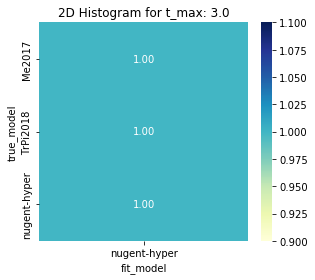

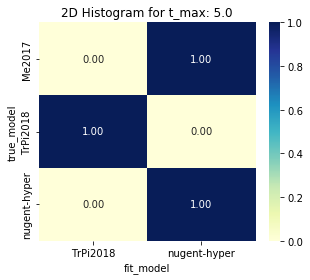

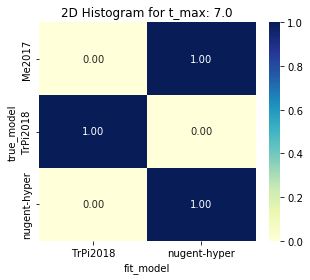

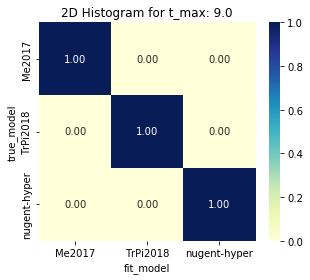

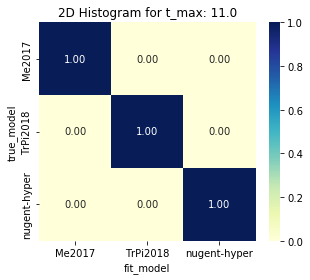

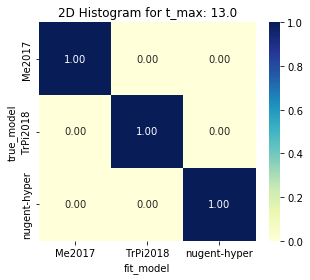

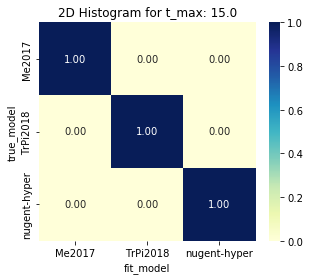

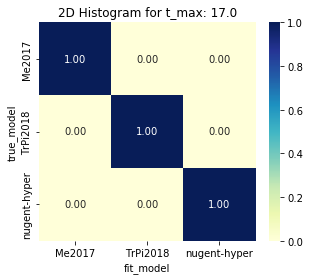

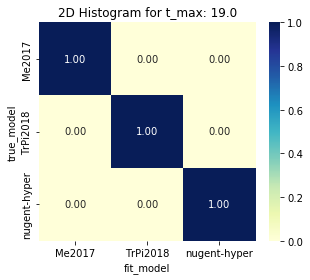

In [4]:
## for each lbf_df timestep, plot a 2d histogram of the true_mdodel vs fit_model
for tmax in sorted(lbf_df['t_max'].unique()):
    tmax_df = lbf_df[lbf_df['t_max'] == tmax]
    fig, ax = plt.subplots(1, 1, figsize=(4.5, 4))
    heatmap_data = tmax_df.groupby(['true_model', 'fit_model']).size().unstack().fillna(0).apply(lambda x: x / x.sum(), axis=1)
    sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap="YlGnBu")
    ax.set_title(f'2D Histogram for t_max: {tmax}')
    fig.tight_layout()
    plt.show()